# Exploratory Data Analysis: Columns 15-28
## Time & Road Characteristics Features

**Analyst:** Artur Loreit  
**Date:** October 29, 2025

### Assigned Columns:
- **15-16:** Time features (hour, minute)
- **17-28:** Road/location characteristics (category, lanes, profile, alignment, etc.)

---

## Setup & Data Loading

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [24]:
# Load the data
df = pd.read_csv('../../data/final_table_proposal.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")

Dataset shape: (125789, 81)
Total rows: 125,789
Total columns: 81


In [25]:
# Define your assigned columns
MY_COLUMNS = [
    'hour',                              # 15
    'minute',                            # 16
    'road_category',                     # 17
    'road_number',                       # 18
    'road_number_index',                 # 19
    'road_number_letter',                # 20
    'traffic_regime',                    # 21
    'number_of_traffic_lanes',           # 22
    'reserved_lane_present',             # 23
    'longitudinal_profile',              # 24
    'nearest_reference_marker',          # 25
    'nearest_reference_marker_distance', # 26
    'horizontal_alignment',              # 27
    'width_central_reservation'          # 28
]

# Subset data for analysis
df_subset = df[MY_COLUMNS].copy()

# Also keep the target variable for analysis
df_subset['injury_severity'] = df['injury_severity']

print(f"\nSubset shape: {df_subset.shape}")
df_subset.head()


Subset shape: (125789, 15)


,hour,minute,road_category,road_number,road_number_index,road_number_letter,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,nearest_reference_marker,nearest_reference_marker_distance,horizontal_alignment,width_central_reservation,injury_severity
0,6,0,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,4
1,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,1
2,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,3
3,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,3
4,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,1


---
## 1. Data Quality Assessment

In [26]:
# Check data types and missing values
print("=" * 80)
print("DATA QUALITY OVERVIEW")
print("=" * 80)

quality_df = pd.DataFrame({
    'Column': MY_COLUMNS,
    'Data Type': [df_subset[col].dtype for col in MY_COLUMNS],
    'Missing Count': [df_subset[col].isna().sum() for col in MY_COLUMNS],
    'Missing %': [f"{df_subset[col].isna().sum() / len(df_subset) * 100:.2f}%" for col in MY_COLUMNS],
    'Unique Values': [df_subset[col].nunique() for col in MY_COLUMNS]
})

quality_df

DATA QUALITY OVERVIEW


,Column,Data Type,Missing Count,Missing %,Unique Values
0,hour,int64,0,0.00%,24
1,minute,int64,0,0.00%,60
2,road_category,int64,0,0.00%,8
3,road_number,object,11645,9.26%,16645
4,road_number_index,int64,0,0.00%,4
5,road_number_letter,object,112821,89.69%,24
6,traffic_regime,int64,0,0.00%,5
7,number_of_traffic_lanes,int64,0,0.00%,14
8,reserved_lane_present,int64,0,0.00%,5
9,longitudinal_profile,int64,0,0.00%,5


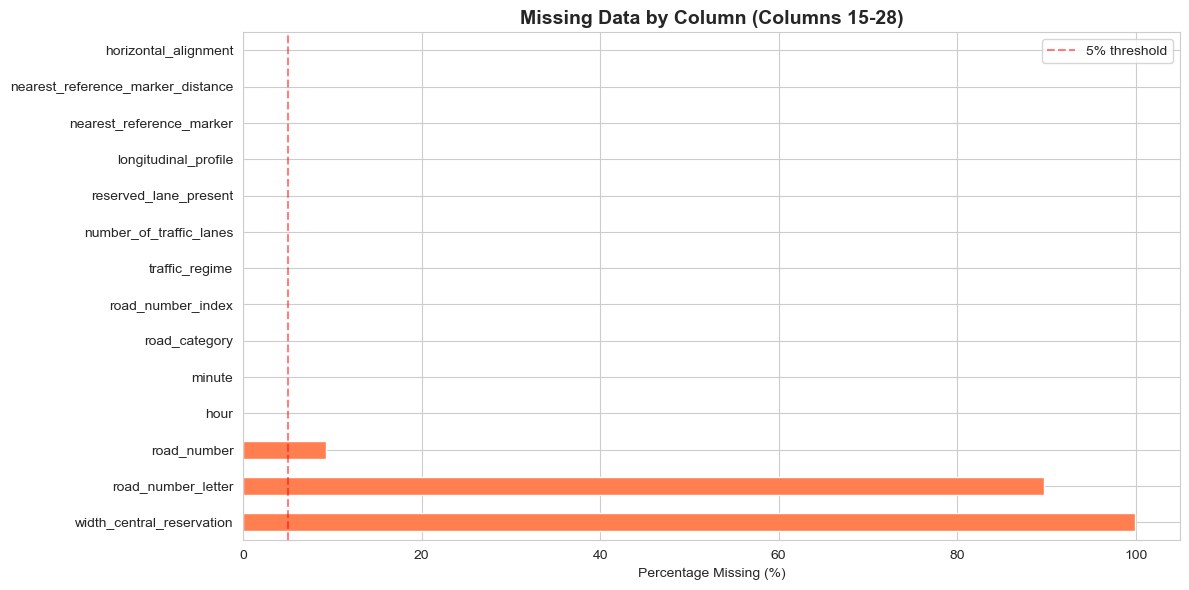

In [27]:
# Visualize missing data patterns
missing_pct = (df_subset[MY_COLUMNS].isna().sum() / len(df_subset) * 100).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing_pct.plot(kind='barh', color='coral')
plt.xlabel('Percentage Missing (%)')
plt.title('Missing Data by Column (Columns 15-28)', fontsize=14, fontweight='bold')
plt.axvline(x=5, color='red', linestyle='--', alpha=0.5, label='5% threshold')
plt.legend()
plt.tight_layout()
plt.show()

---
## 2. Univariate Analysis

### 2.1 Time Features (hour, minute)

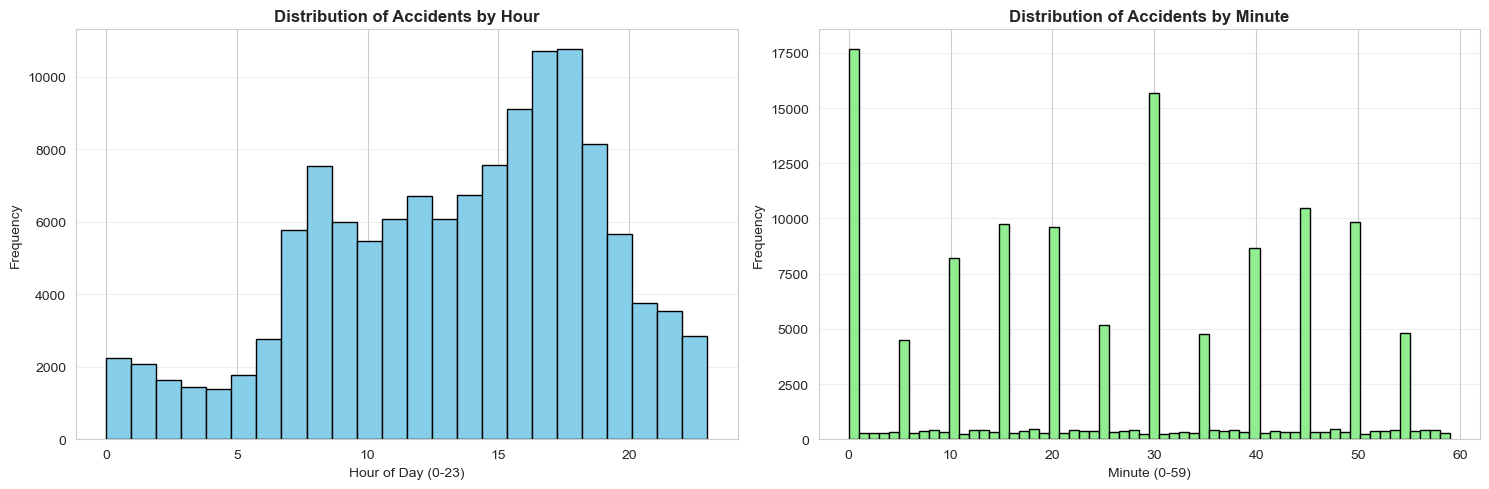


Time Features Summary:
                hour         minute
count  125789.000000  125789.000000
mean       13.483286      26.167423
std         5.544602      17.535898
min         0.000000       0.000000
25%         9.000000      10.000000
50%        14.000000      28.000000
75%        18.000000      40.000000
max        23.000000      59.000000


In [28]:
# Hour distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Hour distribution
axes[0].hist(df_subset['hour'].dropna(), bins=24, edgecolor='black', color='skyblue')
axes[0].set_xlabel('Hour of Day (0-23)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Accidents by Hour', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Minute distribution
axes[1].hist(df_subset['minute'].dropna(), bins=60, edgecolor='black', color='lightgreen')
axes[1].set_xlabel('Minute (0-59)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Accidents by Minute', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nTime Features Summary:")
print(df_subset[['hour', 'minute']].describe())

### 2.2 Categorical Road Features

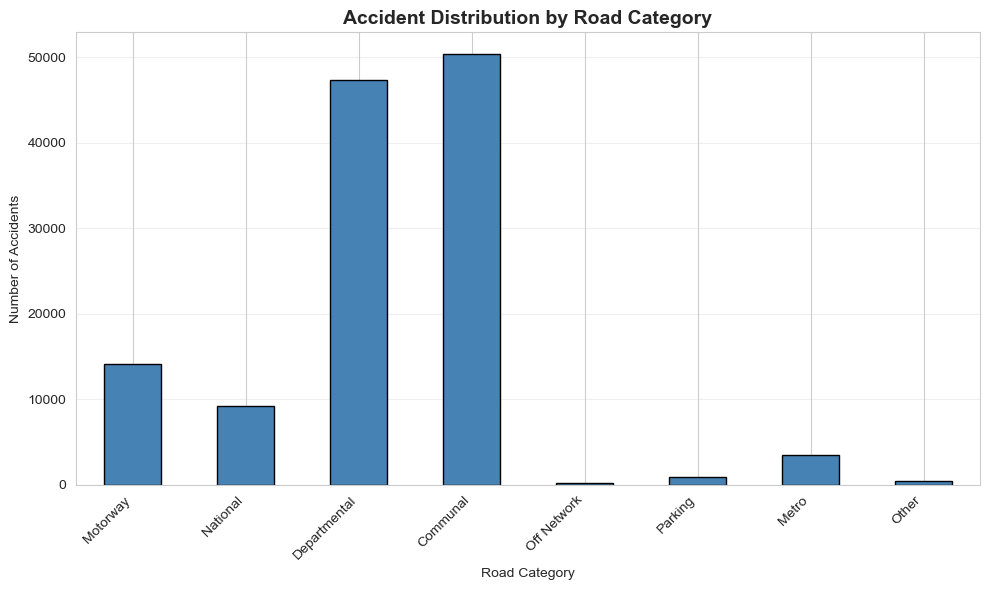


Most common road category: Communal (50,381 accidents)


In [29]:
# Road Category distribution
# From documentation: 1=Motorway, 2=National, 3=Departmental, 4=Communal, 5=Off network, 6=Parking, 7=Metro, 9=Other
road_cat_labels = {1: 'Motorway', 2: 'National', 3: 'Departmental', 4: 'Communal', 
                   5: 'Off Network', 6: 'Parking', 7: 'Metro', 9: 'Other'}

road_cat_counts = df_subset['road_category'].value_counts().sort_index()
road_cat_labeled = road_cat_counts.rename(index=road_cat_labels)

plt.figure(figsize=(10, 6))
road_cat_labeled.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Road Category')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Road Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nMost common road category: {road_cat_labels.get(road_cat_counts.idxmax())} ({road_cat_counts.max():,} accidents)")

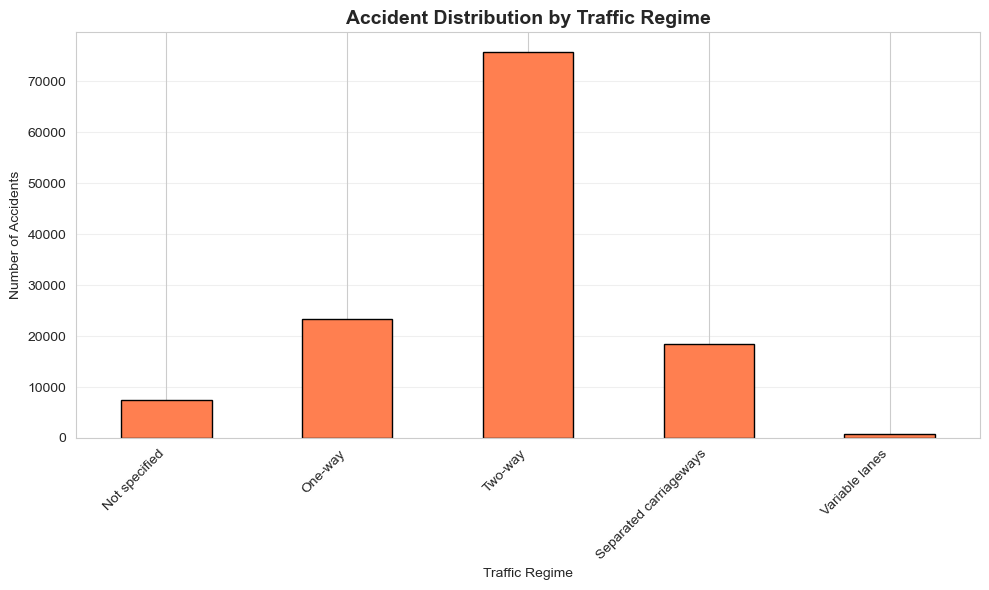

In [30]:
# Traffic Regime distribution
# -1=Not specified, 1=One-way, 2=Two-way, 3=Separated, 4=Variable lanes
traffic_labels = {-1: 'Not specified', 1: 'One-way', 2: 'Two-way', 
                  3: 'Separated carriageways', 4: 'Variable lanes'}

traffic_counts = df_subset['traffic_regime'].value_counts().sort_index()
traffic_labeled = traffic_counts.rename(index=traffic_labels)

plt.figure(figsize=(10, 6))
traffic_labeled.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Traffic Regime')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Traffic Regime', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

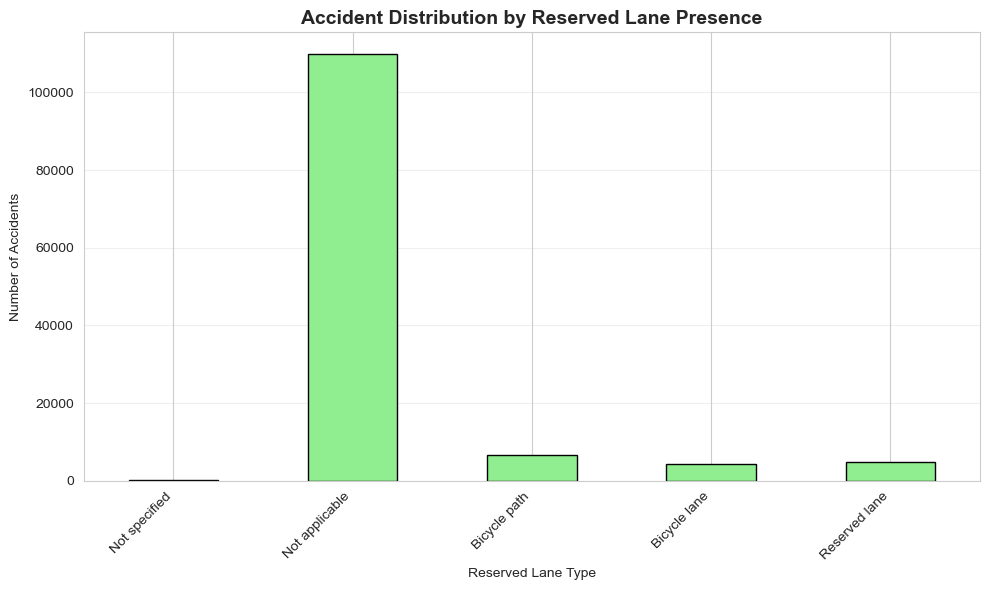

In [31]:
# Reserved Lane Present
# -1=Not specified, 0=Not applicable, 1=Bicycle path, 2=Bicycle lane, 3=Reserved lane
reserved_labels = {-1: 'Not specified', 0: 'Not applicable', 1: 'Bicycle path', 
                   2: 'Bicycle lane', 3: 'Reserved lane'}

reserved_counts = df_subset['reserved_lane_present'].value_counts().sort_index()
reserved_labeled = reserved_counts.rename(index=reserved_labels)

plt.figure(figsize=(10, 6))
reserved_labeled.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Reserved Lane Type')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Reserved Lane Presence', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

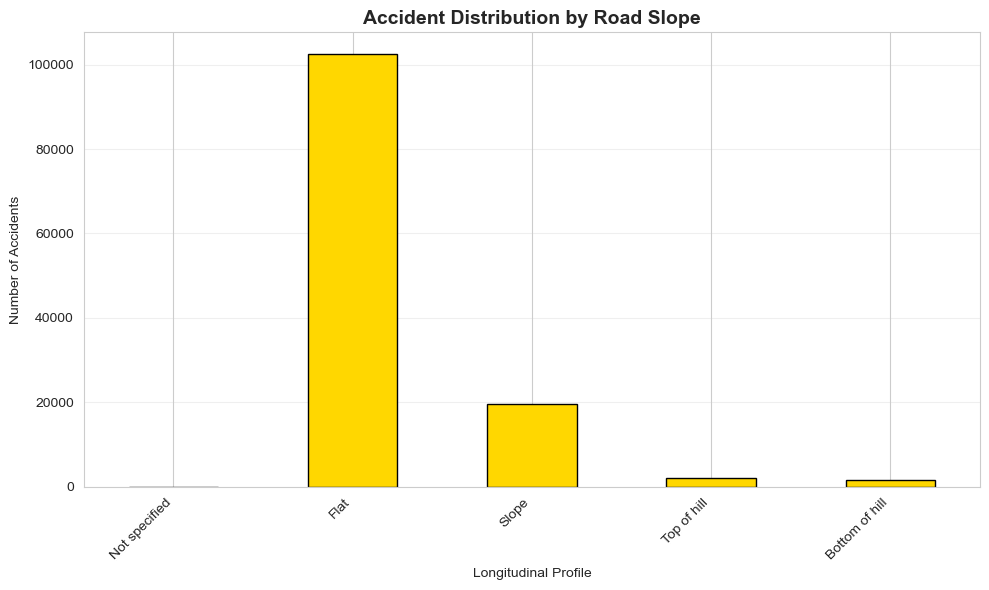

In [32]:
# Longitudinal Profile (slope)
# -1=Not specified, 1=Flat, 2=Slope, 3=Top of hill, 4=Bottom of hill
profile_labels = {-1: 'Not specified', 1: 'Flat', 2: 'Slope', 
                  3: 'Top of hill', 4: 'Bottom of hill'}

profile_counts = df_subset['longitudinal_profile'].value_counts().sort_index()
profile_labeled = profile_counts.rename(index=profile_labels)

plt.figure(figsize=(10, 6))
profile_labeled.plot(kind='bar', color='gold', edgecolor='black')
plt.xlabel('Longitudinal Profile')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Road Slope', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

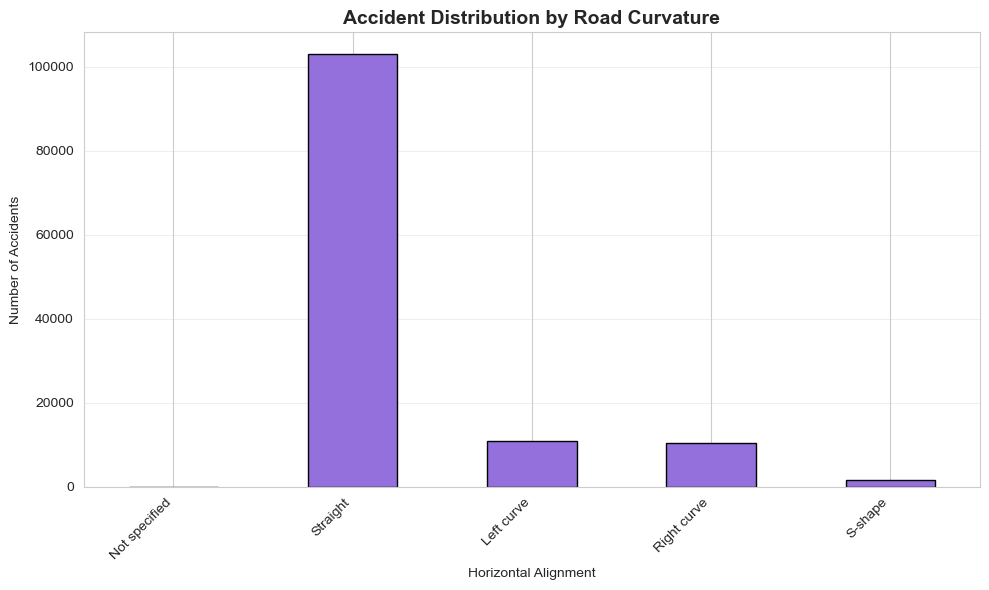

In [33]:
# Horizontal Alignment (curve)
# -1=Not specified, 1=Straight, 2=Left curve, 3=Right curve, 4=S-shape
alignment_labels = {-1: 'Not specified', 1: 'Straight', 2: 'Left curve', 
                    3: 'Right curve', 4: 'S-shape'}

alignment_counts = df_subset['horizontal_alignment'].value_counts().sort_index()
alignment_labeled = alignment_counts.rename(index=alignment_labels)

plt.figure(figsize=(10, 6))
alignment_labeled.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.xlabel('Horizontal Alignment')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Road Curvature', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 2.3 Numerical Road Features

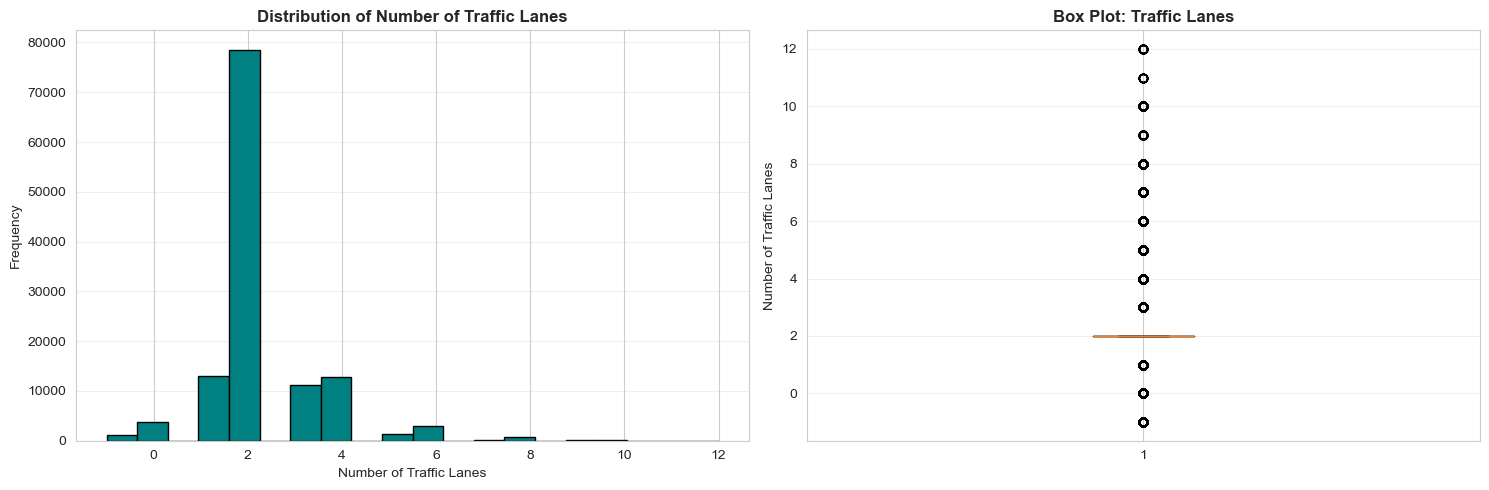


Number of Traffic Lanes - Summary:
count    125789.000000
mean          2.284262
std           1.245658
min          -1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          12.000000
Name: number_of_traffic_lanes, dtype: float64


In [34]:
# Number of traffic lanes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_subset['number_of_traffic_lanes'].dropna(), bins=20, edgecolor='black', color='teal')
axes[0].set_xlabel('Number of Traffic Lanes')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Number of Traffic Lanes', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df_subset['number_of_traffic_lanes'].dropna(), vert=True)
axes[1].set_ylabel('Number of Traffic Lanes')
axes[1].set_title('Box Plot: Traffic Lanes', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNumber of Traffic Lanes - Summary:")
print(df_subset['number_of_traffic_lanes'].describe())

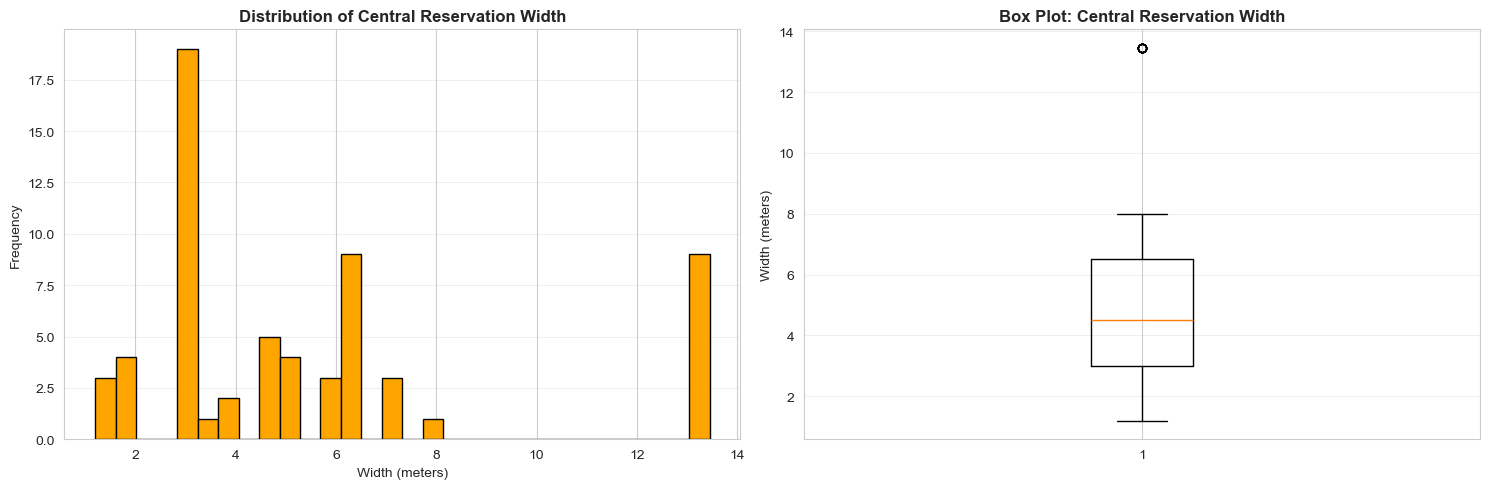


Central Reservation Width - Summary:
count    63.000000
mean      5.523651
std       3.652705
min       1.200000
25%       3.000000
50%       4.500000
75%       6.500000
max      13.450000
Name: width_central_reservation, dtype: float64


In [35]:
# Width of central reservation (often missing for roads without one)
if df_subset['width_central_reservation'].notna().sum() > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    axes[0].hist(df_subset['width_central_reservation'].dropna(), bins=30, edgecolor='black', color='orange')
    axes[0].set_xlabel('Width (meters)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution of Central Reservation Width', fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Box plot
    axes[1].boxplot(df_subset['width_central_reservation'].dropna(), vert=True)
    axes[1].set_ylabel('Width (meters)')
    axes[1].set_title('Box Plot: Central Reservation Width', fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nCentral Reservation Width - Summary:")
    print(df_subset['width_central_reservation'].describe())
else:
    print("\n⚠️ Width of central reservation is completely missing - likely to be dropped in feature selection.")

---
## 3. Bivariate Analysis with Target Variable

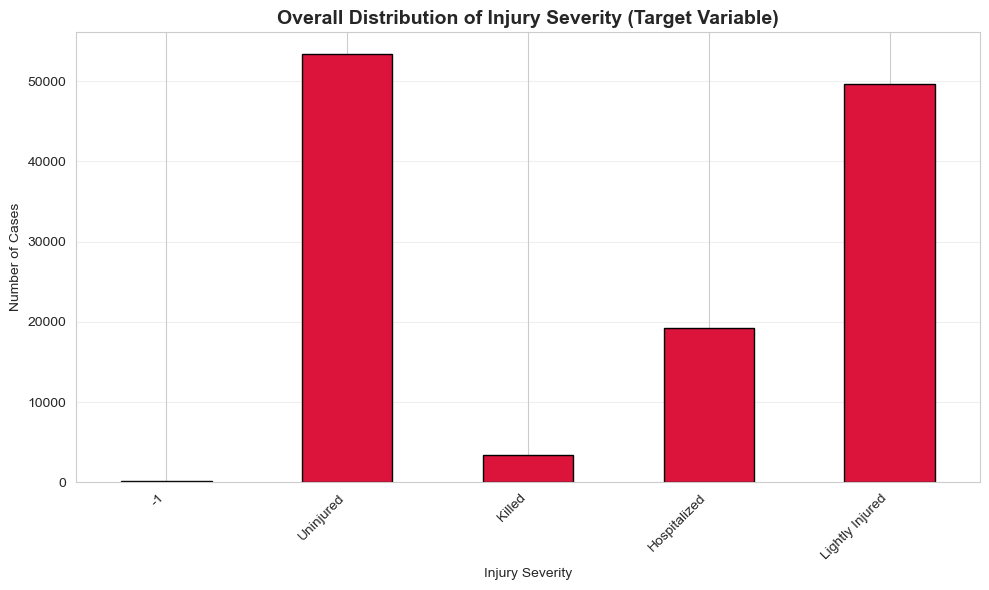


Injury Severity Percentages:
injury_severity
-1                  0.09
Uninjured          42.45
Killed              2.70
Hospitalized       15.32
Lightly Injured    39.43
Name: count, dtype: float64


In [36]:
# Injury severity distribution (reference)
injury_labels = {1: 'Uninjured', 2: 'Killed', 3: 'Hospitalized', 4: 'Lightly Injured'}
injury_counts = df_subset['injury_severity'].value_counts().sort_index()
injury_labeled = injury_counts.rename(index=injury_labels)

plt.figure(figsize=(10, 6))
injury_labeled.plot(kind='bar', color='crimson', edgecolor='black')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Cases')
plt.title('Overall Distribution of Injury Severity (Target Variable)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInjury Severity Percentages:")
print((injury_labeled / injury_labeled.sum() * 100).round(2))

### 3.1 Time vs Injury Severity

<Figure size 1400x600 with 0 Axes>

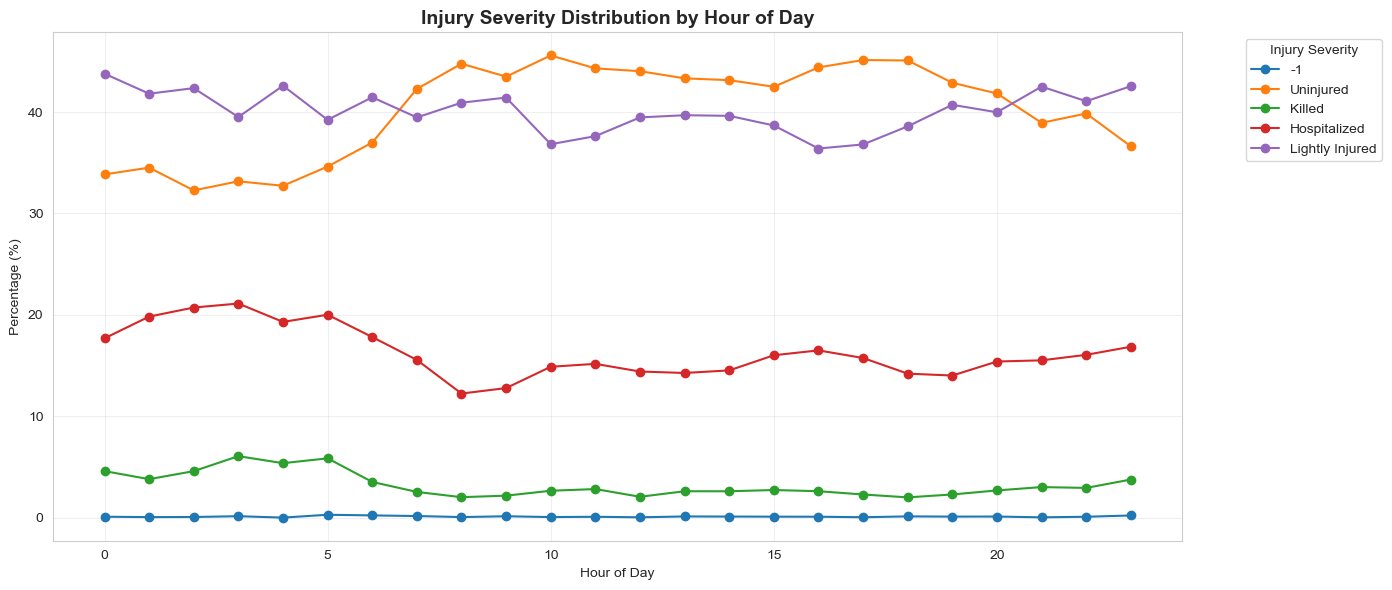

In [37]:
# Hour of day vs injury severity
hour_severity = pd.crosstab(df_subset['hour'], df_subset['injury_severity'], normalize='index') * 100
hour_severity.columns = [injury_labels.get(col, col) for col in hour_severity.columns]

plt.figure(figsize=(14, 6))
hour_severity.plot(kind='line', marker='o', figsize=(14, 6))
plt.xlabel('Hour of Day')
plt.ylabel('Percentage (%)')
plt.title('Injury Severity Distribution by Hour of Day', fontsize=14, fontweight='bold')
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 3.2 Road Category vs Injury Severity

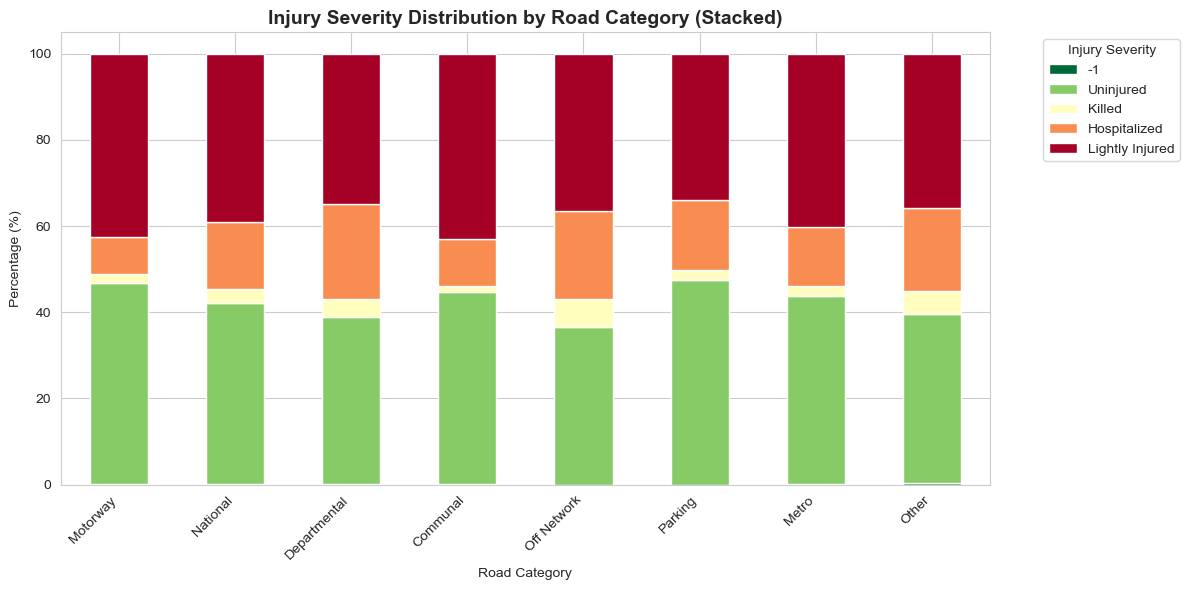

In [38]:
# Road category vs injury severity
road_severity = pd.crosstab(df_subset['road_category'], df_subset['injury_severity'], normalize='index') * 100
road_severity.index = [road_cat_labels.get(idx, idx) for idx in road_severity.index]
road_severity.columns = [injury_labels.get(col, col) for col in road_severity.columns]

road_severity.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='RdYlGn_r')
plt.xlabel('Road Category')
plt.ylabel('Percentage (%)')
plt.title('Injury Severity Distribution by Road Category (Stacked)', fontsize=14, fontweight='bold')
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3.3 Traffic Lanes vs Injury Severity

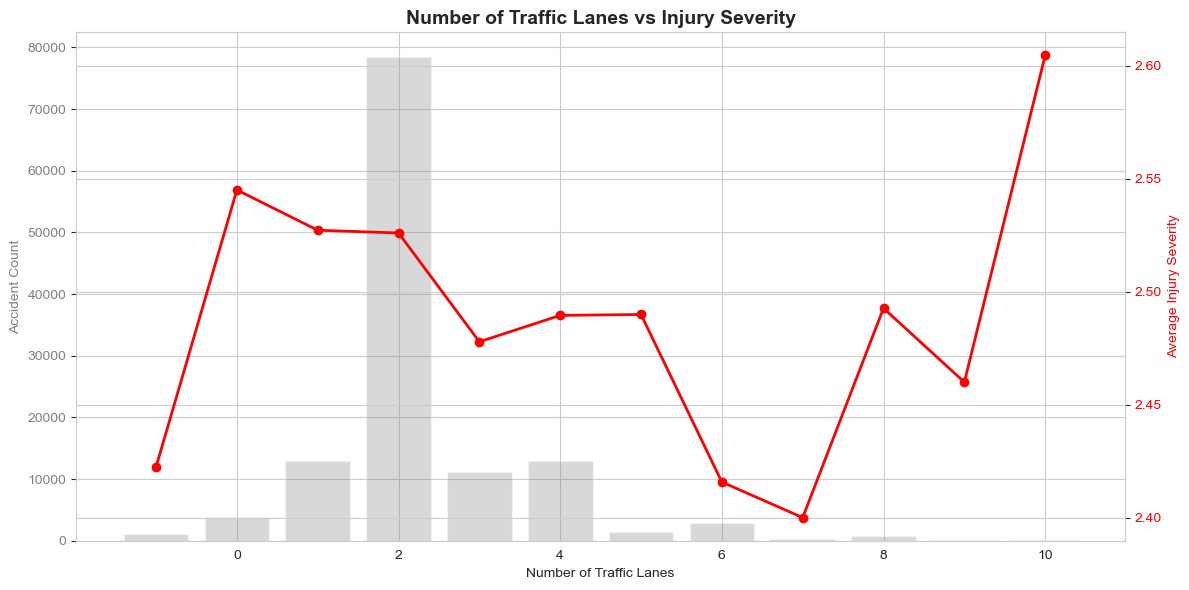

In [39]:
# Number of lanes vs average injury severity
lanes_severity = df_subset.groupby('number_of_traffic_lanes')['injury_severity'].agg(['mean', 'count'])
lanes_severity = lanes_severity[lanes_severity['count'] >= 50]  # Filter for statistical significance

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(lanes_severity.index, lanes_severity['count'], alpha=0.3, color='gray', label='Accident Count')
ax1.set_xlabel('Number of Traffic Lanes')
ax1.set_ylabel('Accident Count', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax2 = ax1.twinx()
ax2.plot(lanes_severity.index, lanes_severity['mean'], color='red', marker='o', linewidth=2, label='Avg Injury Severity')
ax2.set_ylabel('Average Injury Severity', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Number of Traffic Lanes vs Injury Severity', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

### 3.4 Road Profile/Alignment vs Injury Severity

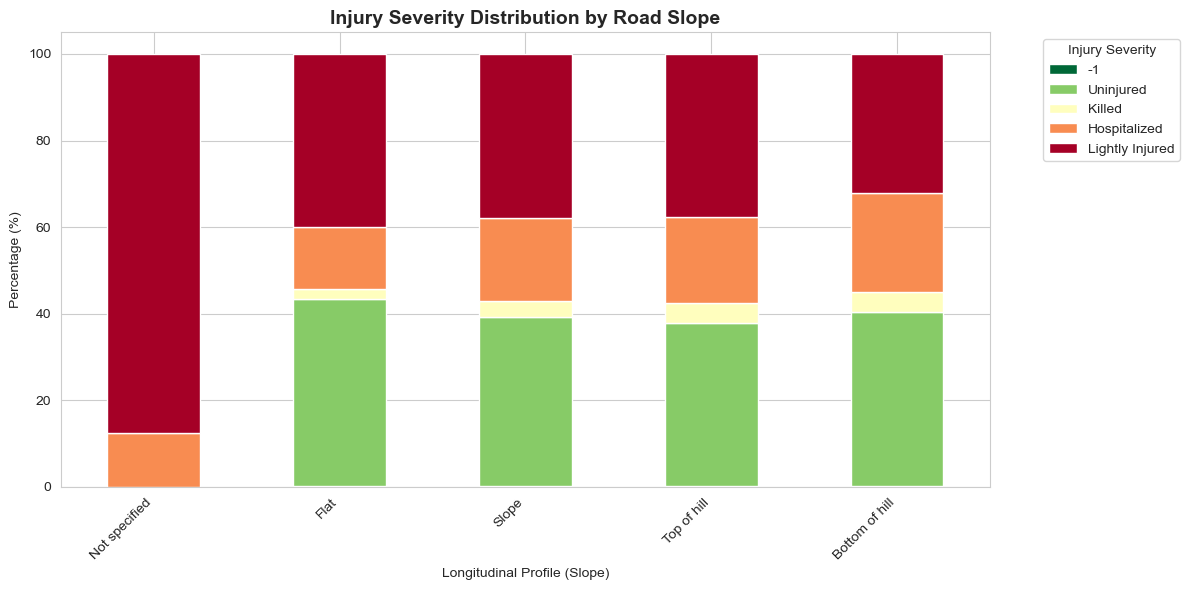

In [40]:
# Longitudinal profile vs injury severity
profile_severity = pd.crosstab(df_subset['longitudinal_profile'], df_subset['injury_severity'], normalize='index') * 100
profile_severity.index = [profile_labels.get(idx, idx) for idx in profile_severity.index]
profile_severity.columns = [injury_labels.get(col, col) for col in profile_severity.columns]

profile_severity.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='RdYlGn_r')
plt.xlabel('Longitudinal Profile (Slope)')
plt.ylabel('Percentage (%)')
plt.title('Injury Severity Distribution by Road Slope', fontsize=14, fontweight='bold')
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

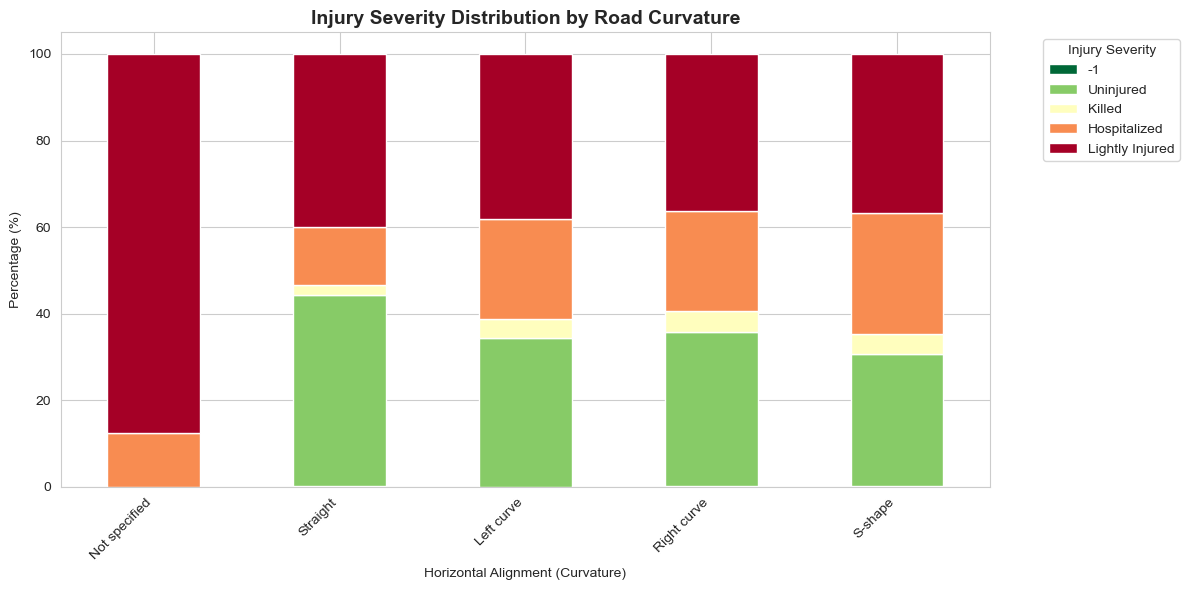

In [41]:
# Horizontal alignment vs injury severity
alignment_severity = pd.crosstab(df_subset['horizontal_alignment'], df_subset['injury_severity'], normalize='index') * 100
alignment_severity.index = [alignment_labels.get(idx, idx) for idx in alignment_severity.index]
alignment_severity.columns = [injury_labels.get(col, col) for col in alignment_severity.columns]

alignment_severity.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='RdYlGn_r')
plt.xlabel('Horizontal Alignment (Curvature)')
plt.ylabel('Percentage (%)')
plt.title('Injury Severity Distribution by Road Curvature', fontsize=14, fontweight='bold')
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
## 4. Statistical Testing

In [42]:
# Chi-square test for categorical variables vs injury severity
from scipy.stats import chi2_contingency

categorical_features = ['road_category', 'traffic_regime', 'reserved_lane_present', 
                       'longitudinal_profile', 'horizontal_alignment']

print("=" * 80)
print("CHI-SQUARE TEST RESULTS: Feature Independence from Injury Severity")
print("=" * 80)
print(f"{'Feature':<35} {'Chi2 Statistic':>15} {'p-value':>12} {'Significant?':>15}")
print("-" * 80)

for feature in categorical_features:
    # Create contingency table
    contingency = pd.crosstab(df_subset[feature], df_subset['injury_severity'])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    
    # Determine significance (alpha = 0.05)
    is_significant = "YES ✓" if p_value < 0.05 else "NO"
    
    print(f"{feature:<35} {chi2:>15.2f} {p_value:>12.4e} {is_significant:>15}")

print("\nNote: p-value < 0.05 indicates the feature is significantly associated with injury severity")

CHI-SQUARE TEST RESULTS: Feature Independence from Injury Severity
Feature                              Chi2 Statistic      p-value    Significant?
--------------------------------------------------------------------------------
road_category                               3967.23   0.0000e+00           YES ✓
traffic_regime                              2862.99   0.0000e+00           YES ✓
reserved_lane_present                        723.26  1.4439e-143           YES ✓
longitudinal_profile                         621.77  5.5009e-122           YES ✓
horizontal_alignment                        2069.56   0.0000e+00           YES ✓

Note: p-value < 0.05 indicates the feature is significantly associated with injury severity


In [43]:
# ANOVA for numerical features vs injury severity
from scipy.stats import f_oneway

numerical_features = ['hour', 'minute', 'number_of_traffic_lanes']

print("\n" + "=" * 80)
print("ANOVA TEST RESULTS: Numerical Features vs Injury Severity")
print("=" * 80)
print(f"{'Feature':<35} {'F-Statistic':>15} {'p-value':>12} {'Significant?':>15}")
print("-" * 80)

for feature in numerical_features:
    # Create groups by injury severity
    groups = [df_subset[df_subset['injury_severity'] == sev][feature].dropna() 
              for sev in df_subset['injury_severity'].unique()]
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(*groups)
    
    # Determine significance
    is_significant = "YES ✓" if p_value < 0.05 else "NO"
    
    print(f"{feature:<35} {f_stat:>15.2f} {p_value:>12.4e} {is_significant:>15}")

print("\nNote: p-value < 0.05 indicates significant difference in means across injury severity groups")


ANOVA TEST RESULTS: Numerical Features vs Injury Severity
Feature                                 F-Statistic      p-value    Significant?
--------------------------------------------------------------------------------
hour                                          31.85   1.4521e-26           YES ✓
minute                                         0.20   9.3972e-01              NO
number_of_traffic_lanes                      160.40  3.4409e-137           YES ✓

Note: p-value < 0.05 indicates significant difference in means across injury severity groups
hour                                          31.85   1.4521e-26           YES ✓
minute                                         0.20   9.3972e-01              NO
number_of_traffic_lanes                      160.40  3.4409e-137           YES ✓

Note: p-value < 0.05 indicates significant difference in means across injury severity groups


---
## 5. Correlation Analysis

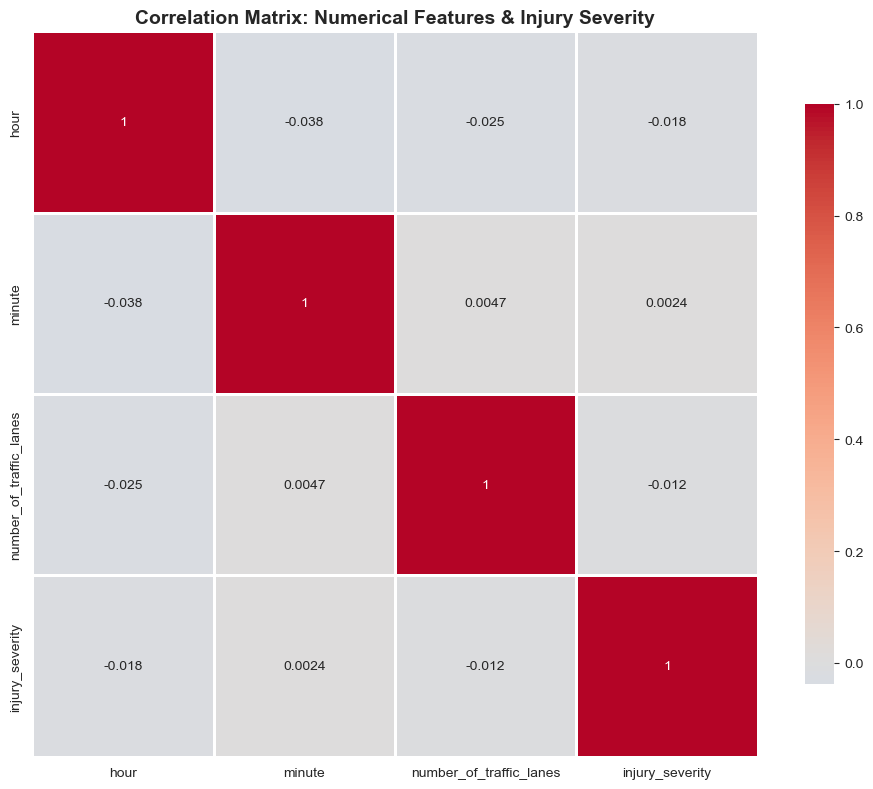

In [44]:
# Correlation matrix for numerical features
numerical_cols = ['hour', 'minute', 'number_of_traffic_lanes', 'injury_severity']
corr_matrix = df_subset[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Numerical Features & Injury Severity', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 6. Key Insights & Recommendations

### Summary of Findings

## 1. Data Quality Assessment
  - `road_number_letter`: High missingness (expected - not all roads have letter designations)
  - `width_central_reservation`: High missingness (expected - only applicable to divided highways)
  - All other features: Complete or near-complete data

`road_number_letter` and `width_central_reservation` can be dropped in feature selection due to limited usefulness

## 2. Temporal Patterns (Time Features)

### **Peak Accident Hours**
- **Afternoon rush hour (17:00-18:00)**: Highest accident frequency (~11,000+ accidents)
- **Secondary peaks**: Morning rush (8:00-9:00) and evening (16:00-19:00)
- **Lowest risk**: Early morning hours (3:00-5:00)

### **Injury Severity by Time**
- **Hour is SIGNIFICANTLY related to injury severity** (p < 0.001)
- Night hours show different injury patterns than daytime
- **Minute is NOT significant** (p = 0.94) - can be dropped or aggregated, police men tend to roundoff to the next full 5 minutes

**Key Finding**: Time of day matters for predicting outcomes, but exact minute does not.

---

## 3. Road Category Analysis

### **Accident Distribution**
- **Communal roads**: 50,381 accidents (40% of total) - HIGHEST RISK
- **Departmental roads**: 47,143 accidents (37.5%)
- **Motorways**: 13,931 accidents (11%) - despite higher speeds, fewer total accidents
- **National roads**: 9,353 accidents (7.4%)

### **Statistical Significance**
- **Chi² = 3967.23, p < 0.001**: Road category is HIGHLY significant for injury severity
- Urban communal roads have different risk profiles than high-speed motorways

**Key Finding**: Road type is a critical predictor - local/communal roads account for the majority of accidents.

---

## 4. Traffic Infrastructure Characteristics

### **Traffic Regime**
- **Two-way traffic**: Most common configuration, highest accident count
- **Chi² = 2863, p < 0.001**: HIGHLY significant predictor
- Two-way roads show different injury patterns than separated carriageways

### **Reserved Lanes**
- Majority of accidents occur where no special lanes are present
- **Chi² = 723, p < 0.001**: SIGNIFICANT association with injury severity
- Presence of bicycle infrastructure affects accident outcomes

### **Number of Traffic Lanes**
- **F-statistic = 160.40, p < 0.001**: HIGHLY significant
- Mean lanes: ~2 lanes
- More lanes generally associated with higher-speed roads
- Clear relationship with injury severity patterns

**Key Finding**: Infrastructure complexity (lanes, traffic regime) significantly influences accident severity.

---

## 5. Road Geometry & Alignment

### **Longitudinal Profile (Slope)**
- **Majority**: Flat roads (~80%)
- **Chi² = 621.77, p < 0.001**: SIGNIFICANT predictor
- Hills (top/bottom) show different risk profiles than flat sections

### **Horizontal Alignment (Curvature)**
- **Straight sections**: Vast majority of accidents
- **Chi² = 2069.56, p < 0.001**: HIGHLY significant
- Curves (especially S-shaped) associated with different severity patterns

**Key Finding**: Road geometry matters - curves and hills affect both accident likelihood and severity.

---

## 6. Statistical Significance Summary

### **KEEP - Highly Significant Features** (p < 0.001):
1. **road_category** - Chi² = 3967 ⭐⭐⭐
2. **horizontal_alignment** - Chi² = 2070 ⭐⭐⭐
3. **traffic_regime** - Chi² = 2863 ⭐⭐⭐
4. **number_of_traffic_lanes** - F = 160 ⭐⭐⭐
5. **reserved_lane_present** - Chi² = 723 ⭐⭐
6. **longitudinal_profile** - Chi² = 622 ⭐⭐
7. **hour** - F = 31.85 ⭐

### **DROP - Not Significant**:
- **minute** - F = 0.20, p = 0.94 (no predictive value)

### **DROP - Data Quality Issues**:
- **road_number_letter** - excessive missing values, low information
- **width_central_reservation** - excessive missing values
- **road_number**, **road_number_index**, **nearest_reference_marker**, **nearest_reference_marker_distance** - administrative identifiers, no predictive value

## 7. Recommendations for Modeling

### **Feature Engineering Opportunities**

1. **Time-based features**:
   - Create `rush_hour` binary flag (7-9 AM, 5-7 PM)
   - Create `time_of_day` categories: morning/afternoon/evening/night
   - Drop `minute` completely

2. **Road complexity index**:
   - Already exists in the dataset as `road_complexity_index`
   - Combines lanes, intersection type, road category - use this!

3. **Geometric risk indicators**:
   - Combine `longitudinal_profile` + `horizontal_alignment` for "challenging geometry" flag
   - Straight + flat = baseline; curves + hills = high risk

4. **Infrastructure safety score**:
   - Combine lane count, reserved lanes, traffic regime
   - More separation/infrastructure = potentially safer

### **Preprocessing Recommendations**

1. **Encoding**:
   - Use **ordinal encoding** for road_category (1=motorway to 4=communal reflects hierarchy)
   - Use **one-hot encoding** for alignment, profile (no inherent order)
   - **Label encoding** acceptable for tree-based models

2. **Scaling**:
   - Standardize `number_of_traffic_lanes` for distance-based algorithms
   - Not needed for tree-based models (Random Forest, XGBoost)

3. **Missing Values**:
   - Drop features with >50% missing (already identified above)
   - For remaining: impute with mode for categorical

### **Expected Model Performance**

- **Road category** and **horizontal alignment** are top predictors
- **Hour** provides temporal context
- **Number of lanes** + **traffic regime** capture infrastructure complexity
- Combined, these features should provide **strong predictive power**

### **Potential Issues to Monitor**

1. **Class imbalance** in injury severity (already noted in project outline)
2. **Multicollinearity** between road features (e.g., motorways always have more lanes)
   - Monitor VIF scores
   - Consider PCA if needed
3. **Road category dominance** - may overshadow other features
   - Use feature importance analysis
   - Consider interaction terms

---

## 8. Final Recommendations

### **INCLUDE in Final Model**:
- `hour` (with feature engineering)
- `road_category` ⭐⭐⭐
- `traffic_regime` ⭐⭐⭐
- `number_of_traffic_lanes` ⭐⭐⭐
- `reserved_lane_present` ⭐
- `longitudinal_profile` ⭐⭐
- `horizontal_alignment` ⭐⭐⭐

### **EXCLUDE from Final Model**:
- `minute`
- `road_number`, `road_number_index`, `road_number_letter`
- `nearest_reference_marker`, `nearest_reference_marker_distance`
- `width_central_reservation`

### **TRANSFORM/ENGINEER**:
- Create `rush_hour` from `hour`
- Create `road_geometry_risk` from profile + alignment
- Consider `road_complexity_index` (already engineered)